In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import scipy.stats as stats
import phik
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from scipy.stats import randint
from phik.report import plot_correlation_matrix



sb.set() # set the default Seaborn style for graphics

In [2]:
churndata = pd.read_csv('churn.csv')
churndata.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print(churndata.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [4]:
chrun_num_data = churndata.select_dtypes(exclude=[object])

In [5]:
print(chrun_num_data.dtypes)

Account length              int64
Area code                   int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [6]:
chrun_cat_data = churndata.select_dtypes(include=[object,bool])

In [7]:
chrun_cat_data.astype('category')

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False
...,...,...,...,...
2661,SC,No,No,False
2662,AZ,No,Yes,False
2663,WV,No,No,False
2664,RI,No,No,False


In [8]:
print(chrun_cat_data.dtypes)

State                 object
International plan    object
Voice mail plan       object
Churn                   bool
dtype: object


In [9]:
chrun_num_data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
churn_num_corr = chrun_num_data.iloc[:,:16].corrwith(chrun_num_data['Churn'].astype('float'),method=stats.pointbiserialr)

In [11]:
print(churn_num_corr)

   Account length  Area code  Number vmail messages  Total day minutes  \
0        0.017728   0.001019              -0.086474       1.956879e-01   
1        0.360192   0.958064               0.000008       2.023431e-24   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0         0.018290      1.956889e-01           0.072906        -0.001539   
1         0.345156      2.022321e-24           0.000165         0.936687   

   Total eve charge  Total night minutes  Total night calls  \
0          0.072893             0.033639           0.012262   
1          0.000165             0.082462           0.526830   

   Total night charge  Total intl minutes  Total intl calls  \
0            0.033635            0.086204         -0.069882   
1            0.082496            0.000008          0.000305   

   Total intl charge  Customer service calls  
0           0.086216            2.025903e-01  
1           0.000008            4.318653e-26  


In [12]:
print(churn_num_corr.shape)

(2, 16)


<Axes: >

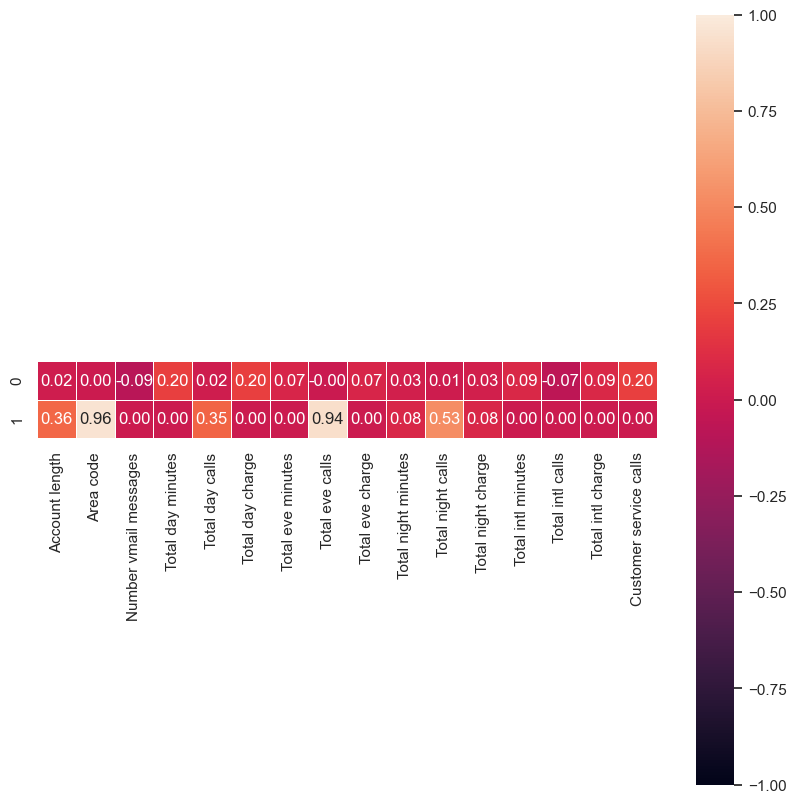

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(churn_num_corr, vmin = -1, vmax = 1, annot = True, fmt= '0.2f', square = True, linewidths= 0.5, ax=ax)

In [14]:
churn_num_corr_T = churn_num_corr.transpose()
churn_num_corr_T.sort_values(by=1,ascending=False)

,0,1
Area code,0.001019,9.580642e-01
Total eve calls,-0.001539,9.366866e-01
Total night calls,0.012262,5.268301e-01
Account length,0.017728,3.601916e-01
Total day calls,0.018290,3.451563e-01
Total night charge,0.033635,8.249586e-02
Total night minutes,0.033639,8.246221e-02
Total intl calls,-0.069882,3.050806e-04
Total eve charge,0.072893,1.652419e-04
Total eve minutes,0.072906,1.647968e-04


Highest corr for churn = 0:

1) Customer service call : 0.202590
2) Total day charge : 0.195689
3) Total day minutes : 0.195688

In [15]:
chrun_cat_data_corr = chrun_cat_data.phik_matrix()

In [16]:
print(chrun_cat_data_corr)

                       State  International plan  Voice mail plan     Churn
State               1.000000            0.048911         0.000000  0.128639
International plan  0.048911            1.000000         0.000000  0.418799
Voice mail plan     0.000000            0.000000         1.000000  0.150517
Churn               0.128639            0.418799         0.150517  1.000000


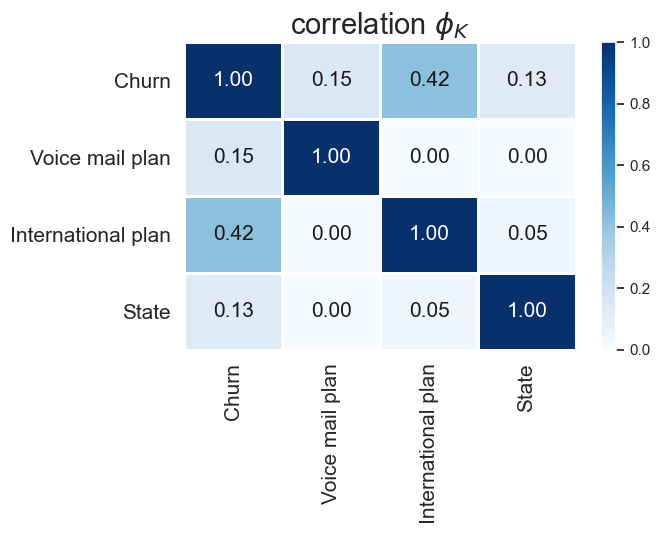

In [17]:
plot_correlation_matrix(chrun_cat_data_corr.values, x_labels=chrun_cat_data_corr.columns, y_labels=chrun_cat_data_corr.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))
plt.tight_layout()

Highest Cat_data with correlation to churn:
1) International plan : 0.42
2) Voice mail plan : 0.15
3) State : 0.13

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [18]:
churn_cat = churndata.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(churndata[churn_cat])
encoded_cat_df = pd.DataFrame(encoded_data,columns = encoder.get_feature_names_out(churn_cat))
churn_OHE = churndata
churn_OHE = churn_OHE.drop(churn_cat,axis = 1)
churn_OHE = pd.concat([churn_OHE, encoded_cat_df],axis = 1)
print(f"Encoded data : \n{churndata}")
print(f"Encoded data : \n{churn_OHE}")

Encoded data : 
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0   

In [19]:
Predictors = churn_OHE.drop(['Churn'],axis = 1)
Response = churn_OHE['Churn']

Predictors_train , Predictors_test, Response_train, Response_test = train_test_split(Predictors, Response, test_size = 0.2, random_state= 10)

In [20]:
rf = RandomForestClassifier()
rf.fit(Predictors_train, Response_train)


RandomForestClassifier()

In [21]:
Response_predict = rf.predict(Predictors_test)
accuracy = accuracy_score(Response_test,Response_predict)
print("Accuracy : ", accuracy)

Accuracy :  0.9325842696629213


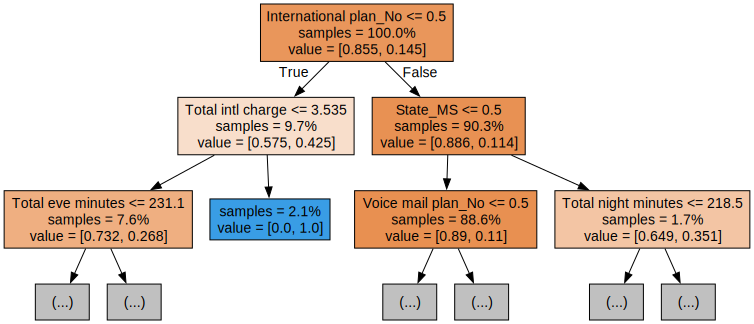

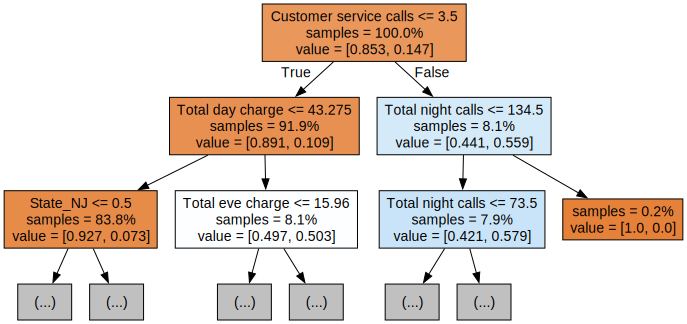

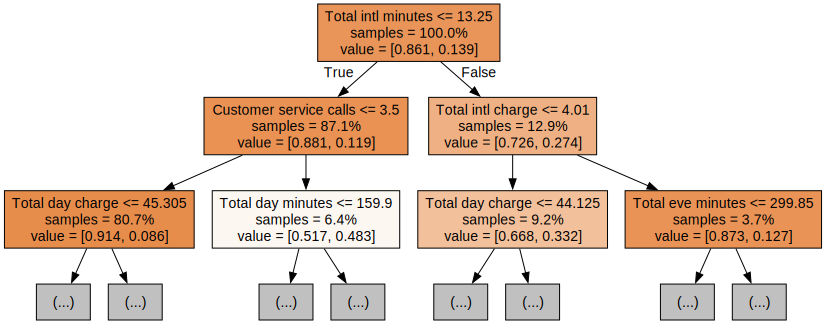

In [22]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, 
                               feature_names = Predictors_train.columns,
                               filled = True,
                               max_depth = 2,
                               impurity = False,
                               proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [23]:
param_dist = {'n_estimators': randint(1,10000),
              'max_depth': randint(1,100)}

rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=10,
                                 cv=5)

rand_search.fit(Predictors_train,Response_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022DF8366300>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022DF81B0710>})

In [24]:
best_rf = rand_search.best_estimator_
print("Best hyperparameters:", best_rf)

Best hyperparameters: RandomForestClassifier(max_depth=92, n_estimators=5379)


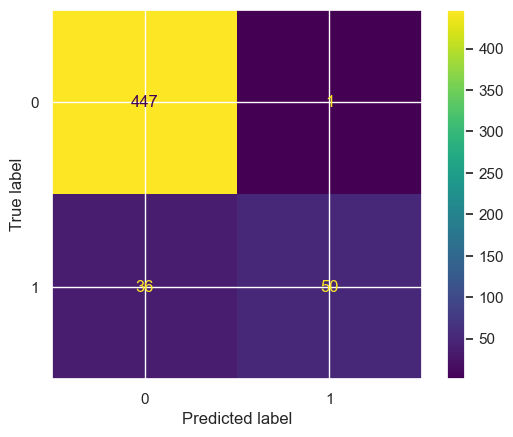

In [25]:
Response_predict = best_rf.predict(Predictors_test)
cm = confusion_matrix(Response_test, Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [26]:
#Response_predict = knn.predict(Predictors_test)

accuracy = accuracy_score(Response_test,Response_predict)
precision = precision_score(Response_test,Response_predict)
recall = recall_score(Response_test,Response_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9307116104868914
Precision: 0.9803921568627451
Recall: 0.5813953488372093


Total day charge          0.117735
Total day minutes         0.115713
Customer service calls    0.093432
Total eve minutes         0.051223
Total eve charge          0.051219
                            ...   
State_KY                  0.000818
State_SD                  0.000780
State_HI                  0.000630
State_MO                  0.000616
State_RI                  0.000604
Length: 71, dtype: float64


<Axes: >

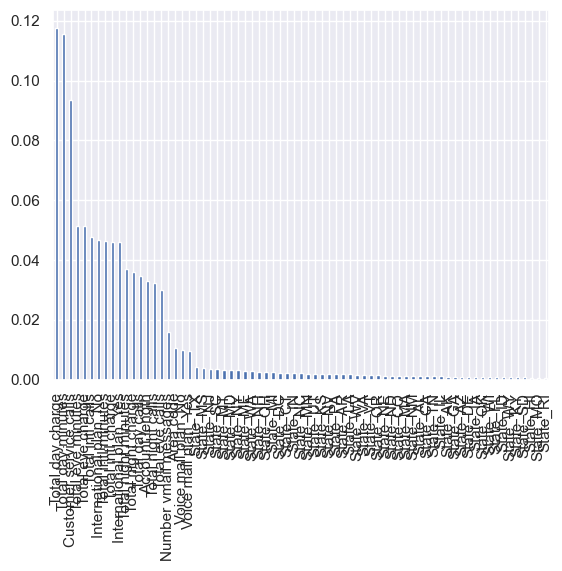

In [27]:
feature_importance = pd.Series(best_rf.feature_importances_,
                               index = Predictors_train.columns).sort_values(ascending=False)

print(feature_importance)
feature_importance.plot.bar()